In [57]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 120

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import sys
import os
sys.path.append(os.path.abspath("../"))
import importlib
import utils as u
import graphs as g
import processing as p
import extraction as e
import selection as s
import model as m
import datasource as ds

In [225]:
train = pd.read_csv('input/train.csv')
macro = pd.read_csv('input/macro.csv')
test = pd.read_csv('input/test.csv')
data = train.append(test)

In [229]:
data.describe()

,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,...,water_km,water_treatment_km,work_all,work_female,work_male,workplaces_km,young_all,young_female,young_male,zd_vokzaly_avto_km
count,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,...,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000
mean,9922.728031,4845.878662,5076.858836,12641.876800,6168.926337,6473.106574,5183.292345,2531.356096,2652.066347,30855.756353,...,0.679687,11.435917,54115.166654,26630.291926,27484.965804,3.953830,11270.873758,5502.157816,5768.770461,17.050539
std,7268.372894,3526.993395,3749.139961,9223.032614,4477.405002,4753.942488,3807.969978,1843.332364,1967.933042,59817.648041,...,0.431069,7.056974,37298.508493,18553.728684,18844.927634,5.058338,8262.762652,4008.752854,4262.120905,10.315603
min,322.000000,156.000000,166.000000,411.000000,198.000000,214.000000,175.000000,85.000000,91.000000,575.000000,...,0.000000,0.274139,1633.000000,771.000000,863.000000,0.000000,365.000000,177.000000,189.000000,0.136715
25%,3255.000000,1720.000000,1600.000000,3959.000000,2067.000000,1973.000000,1792.000000,914.000000,862.000000,5829.000000,...,0.335591,5.386802,16577.000000,7915.000000,8329.000000,1.006486,3639.000000,1905.000000,1782.000000,9.909891
50%,9633.000000,4702.000000,4835.000000,12508.000000,6321.000000,6096.000000,4926.000000,2390.000000,2549.000000,17662.000000,...,0.602777,10.779520,52560.000000,26333.000000,26382.000000,1.986217,10988.000000,5347.000000,5470.000000,14.565736
75%,13682.000000,6721.000000,6880.000000,17425.000000,8619.000000,8746.000000,7103.000000,3484.000000,3589.000000,27006.000000,...,0.942503,16.953350,77062.000000,37556.000000,38782.000000,5.372054,15541.000000,7629.000000,7789.000000,24.061214
max,36035.000000,17461.000000,18574.000000,45170.000000,21937.000000,23233.000000,19223.000000,9236.000000,9987.000000,367659.000000,...,2.827709,47.591240,161290.000000,81668.000000,79622.000000,55.278225,40692.000000,19715.000000,20977.000000,91.215063


# Features selection

In [179]:
importlib.reload(ds)

columns = ['id','full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'price_doc']

train_data = ds.load_train_data(columns)
# train_data.fillna(0, inplace=True)
# train_data.dropna(how='any', inplace=True)
train_data.describe()

Loading train data... *  


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,1.111111e+08


In [ ]:
g.boxplot(train_data, 'price_doc', 'full_sq')

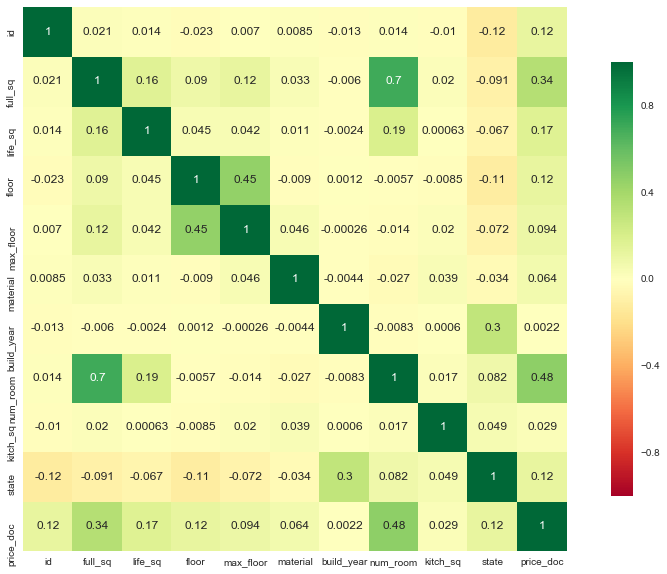

In [178]:
g.plot_correlation_map(train_data)

In [236]:
train_data = ds.load_test_data(columns)
# test_data.fillna(0, inplace=True)
# test_data.dropna(how='any', inplace=True)
train_data.describe()

Loading test data... *  


,build_year,max_floor,state,build_count_block,build_count_brick,kremlin_km,prom_part_2000,prom_part_5000
count,6613.000000,7662.000000,6968.000000,6444.000000,6444.000000,7662.000000,7662.000000,7570.000000
mean,1820.888099,12.591099,1.985792,53.449565,120.205618,15.440871,11.581274,11.100894
std,552.993964,6.659291,0.820086,45.577704,132.614511,8.694792,9.975909,6.101243
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.072897,0.000000,0.590000
25%,1966.000000,9.000000,1.000000,19.000000,20.000000,9.551782,3.120000,6.190000
50%,1982.000000,14.000000,2.000000,44.000000,84.000000,14.096756,9.190000,10.650000
75%,2011.000000,17.000000,3.000000,78.000000,162.000000,20.092917,17.015000,14.700000
max,2019.000000,48.000000,4.000000,223.000000,664.000000,70.738769,55.030000,28.590000


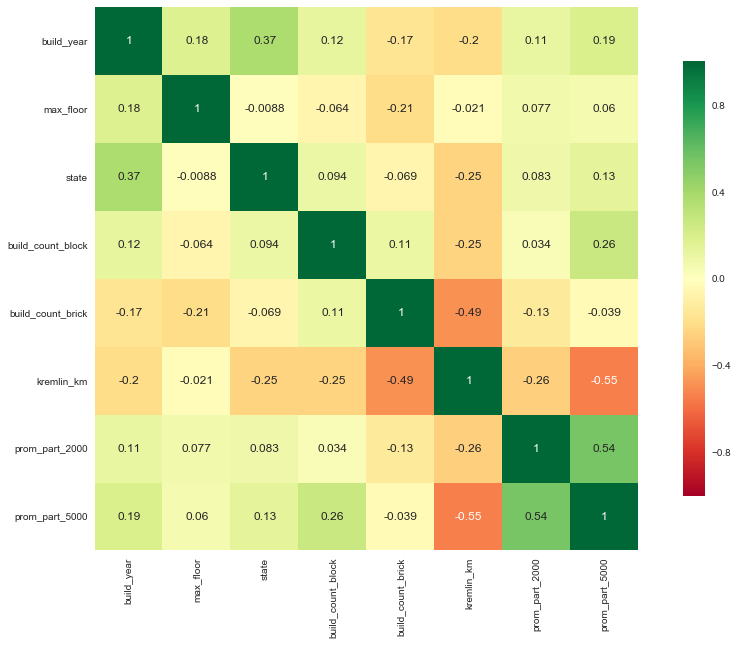

In [234]:
g.plot_correlation_map(year_data)

In [199]:
features = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'kitch_sq', 'num_room', 'state']
X = train_data[features]
y = train_data.price_doc
X.describe()

,full_sq,life_sq,floor,max_floor,build_year,kitch_sq,num_room,state
count,30471.000000,24088.000000,30304.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000
mean,54.214269,34.403271,7.670803,12.558974,3.068057e+03,6.399301,1.909804,2.107025
std,38.031487,52.285733,5.319989,6.756550,1.543878e+05,28.265979,0.851805,0.880148
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,38.000000,20.000000,3.000000,9.000000,1.967000e+03,1.000000,1.000000,1.000000
50%,49.000000,30.000000,6.500000,12.000000,1.979000e+03,6.000000,2.000000,2.000000
75%,63.000000,43.000000,11.000000,17.000000,2.005000e+03,9.000000,2.000000,3.000000
max,5326.000000,7478.000000,77.000000,117.000000,2.005201e+07,2014.000000,19.000000,33.000000


In [200]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

u.log('X train', X_train.shape)
u.log('y train', y_train.shape)
Y_train = np.log1p(y_train)

u.log('X val', X_val.shape)
u.log('y val', y_val.shape)
Y_val = np.log1p(y_val)

X train * (22853, 8) 
y train * (22853,) 
X val * (7618, 8) 
y val * (7618,) 


# Model

[0]	validation_0-rmse:13.6099	validation_1-rmse:13.6179
[1]	validation_0-rmse:12.2514	validation_1-rmse:12.2596
[2]	validation_0-rmse:11.0289	validation_1-rmse:11.0374
[3]	validation_0-rmse:9.9289	validation_1-rmse:9.93765
[4]	validation_0-rmse:8.93917	validation_1-rmse:8.94823
[5]	validation_0-rmse:8.04871	validation_1-rmse:8.05796
[6]	validation_0-rmse:7.24764	validation_1-rmse:7.25707
[7]	validation_0-rmse:6.52703	validation_1-rmse:6.53653
[8]	validation_0-rmse:5.87887	validation_1-rmse:5.88859
[9]	validation_0-rmse:5.29601	validation_1-rmse:5.30595
[10]	validation_0-rmse:4.77191	validation_1-rmse:4.78195
[11]	validation_0-rmse:4.30077	validation_1-rmse:4.31101
[12]	validation_0-rmse:3.87736	validation_1-rmse:3.88769
[13]	validation_0-rmse:3.49696	validation_1-rmse:3.50736
[14]	validation_0-rmse:3.15536	validation_1-rmse:3.16585
[15]	validation_0-rmse:2.84876	validation_1-rmse:2.85928
[16]	validation_0-rmse:2.57371	validation_1-rmse:2.58435
[17]	validation_0-rmse:2.32715	validation_

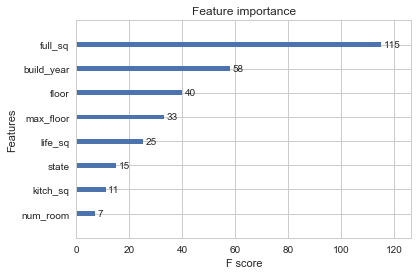

In [201]:
import xgboost as xgb
import operator

xgbr = xgb.XGBRegressor(learning_rate=0.1, n_estimators=50, silent=False)
xgbr.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_val, Y_val)], eval_metric='rmse', verbose=True)

xgb.plot_importance(xgbr)

In [ ]:
year_columns = ['build_year', 'max_floor', 'state', 'build_count_block', 'build_count_brick', 'kremlin_km', 'prom_part_2000', 'prom_part_5000']
year_data = ds.load_test_data(year_columns)
year_data.dropna(inplace=True, how='any')
year_data["build_year"] = year_data["build_year"].apply(lambda year: int(year))

X_year = year_data[year_columns[1:]]
y_year = year_data.build_year

X_year_train, X_year_val, y_year_train, y_year_val = train_test_split(X_year, y_year, test_size=0.01)
u.log('X train', X_year_train.shape)
u.log('y train', y_year_train.shape)
u.log('X val', X_year_val.shape)
u.log('y val', y_year_val.shape)

xgbrc = xgb.XGBClassifier(learning_rate=0.1, n_estimators=25, silent=False)
xgbrc.fit(X_year_train, y_year_train, eval_set=[(X_year_train, y_year_train), (X_year_val, y_year_val)], eval_metric='mlogloss', verbose=True)

# xgb.plot_importance(xgbry)

xgbrc.predict(y_year_val)

Loading test data... *  
X train * (5694, 7) 
y train * (5694,) 
X val * (58, 7) 
y val * (58,) 
[0]	validation_0-mlogloss:4.18044	validation_1-mlogloss:4.2819
[1]	validation_0-mlogloss:3.95827	validation_1-mlogloss:4.08783
[2]	validation_0-mlogloss:3.79183	validation_1-mlogloss:3.94717
[3]	validation_0-mlogloss:3.65782	validation_1-mlogloss:3.83694
[4]	validation_0-mlogloss:3.54562	validation_1-mlogloss:3.7275
[5]	validation_0-mlogloss:3.44661	validation_1-mlogloss:3.64637
[6]	validation_0-mlogloss:3.35867	validation_1-mlogloss:3.58424
[7]	validation_0-mlogloss:3.2801	validation_1-mlogloss:3.52414
[8]	validation_0-mlogloss:3.21039	validation_1-mlogloss:3.45957
[9]	validation_0-mlogloss:3.14696	validation_1-mlogloss:3.40995
[10]	validation_0-mlogloss:3.08965	validation_1-mlogloss:3.36131
[11]	validation_0-mlogloss:3.03625	validation_1-mlogloss:3.32879
[12]	validation_0-mlogloss:2.98806	validation_1-mlogloss:3.28873
[13]	validation_0-mlogloss:2.94201	validation_1-mlogloss:3.25674
[14]	v

# Cross validation

In [152]:
y_pre = np.expm1(xgbr.predict(X_val))

mean_squared_error(y_val, y_pre)

13006741826182.041

# Prediction

In [153]:
importlib.reload(ds)

X_test = ds.load_test_data(features)
X_test.fillna(0, inplace=True)
X_test.describe()

Loading test data... *  


,full_sq,life_sq,floor,max_floor,material,num_room,state
count,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,53.701164,27.647220,7.652571,12.591099,1.854216,1.876403,1.805925
std,20.104320,24.005314,5.099418,6.659291,1.517171,0.835665,0.967722
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,39.200000,18.000000,4.000000,9.000000,1.000000,1.000000,1.000000
50%,50.410000,28.300000,7.000000,14.000000,1.000000,2.000000,2.000000
75%,63.300000,38.600000,11.000000,17.000000,2.000000,2.000000,3.000000
max,403.000000,869.000000,41.000000,48.000000,6.000000,19.000000,4.000000


In [154]:
y_test = np.expm1(xgbr.predict(X_test))
y_test

array([ 4874598.5,  7241842. ,  5187058.5, ...,  4338846. ,  4790817. ,
        6994297. ], dtype=float32)

# Submission

In [155]:
sample = pd.read_csv('input/sample_submission.csv')
print(sample.shape)

submission = pd.DataFrame(columns=['id', 'price_doc'])
submission.id = sample.id
submission.price_doc = y_test
submission.info()

submission.to_csv('submission.csv', index=False)

(7662, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 2 columns):
id           7662 non-null int64
price_doc    7662 non-null float32
dtypes: float32(1), int64(1)
memory usage: 89.9 KB


# References

 * https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-sberbank